## Upper Confidence Bound
Exploration gives insight into less preferrable actions to then pursue and exploit highest estimated reward actions  

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Dataset

In [2]:
dataset = pd.read_csv("datasets/ads.csv")
X = dataset.iloc[:].values

## Create Model

In [6]:
import math

N = len(X)
d = len(X[0])

ads_selected = []
number_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

for n in range(N):

    ad = 0
    max_upper_bound = 0

    for i in range(d):
        if number_of_selections[i] > 0:
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    number_of_selections[ad] += 1

    reward = X[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

## Visualize Results

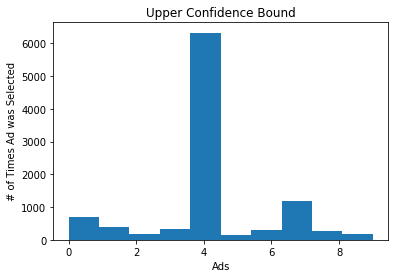

In [9]:
plt.hist(ads_selected)

plt.title("Upper Confidence Bound")
plt.xlabel("Ads")
plt.ylabel("# of Times Ad was Selected")

plt.show()